# Assignment: Numpy and Matplotlib

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

```{admonition} Learning Goals
:class: tip

- Creating new arrays using `linspace` and `arange`
- Computing basic formulas with numpy arrays
- Loading data from `.npy` files
- Performing reductions (e.g. `mean`, `std` on numpy arrays)
- Making 1D line plots
- Making scatterplots
- Annotating plots with titles and axes
```

## 1 Creating and Manipulating Arrays

First import numpy and matplotlib

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [2]:
x = np. linspace (-2, 2, 100)
y = np. linspace (-2, 2, 100)
xx, yy = np.meshgrid(x, y)
print (x)
print (y)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes.

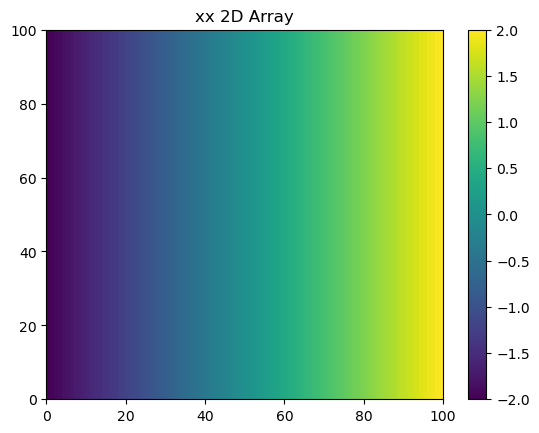

In [3]:
plt.pcolormesh(xx)
plt.colorbar()
plt.title ('xx 2D Array')
plt.show()

yy 2D Array


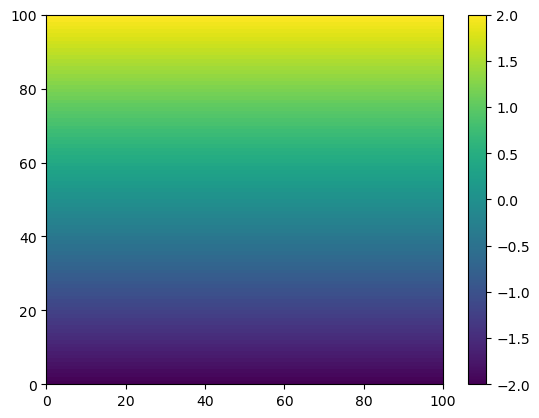

In [4]:
plt.pcolormesh(yy)
plt.colorbar()
print ("yy 2D Array")
plt.show()

### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [5]:
r = np.sqrt (xx**2 + yy**2)
φ = np.arctan2 (yy, xx)

### 1.4. Visualize $r$ and $\varphi$ on the 2D  $x$ / $y$ plane using `pcolormesh`

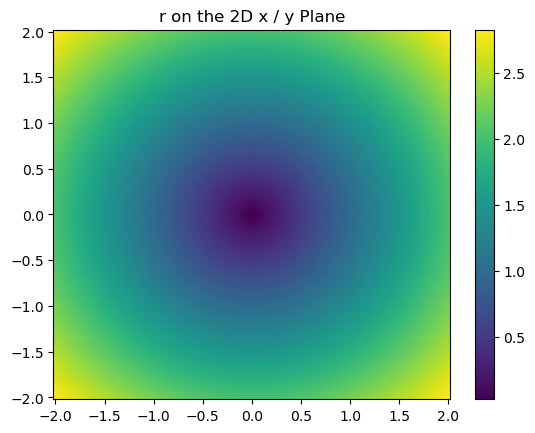

In [6]:
plt.pcolormesh(xx, yy, r)
plt.colorbar()
plt.title ('r on the 2D x / y Plane')
plt.show()

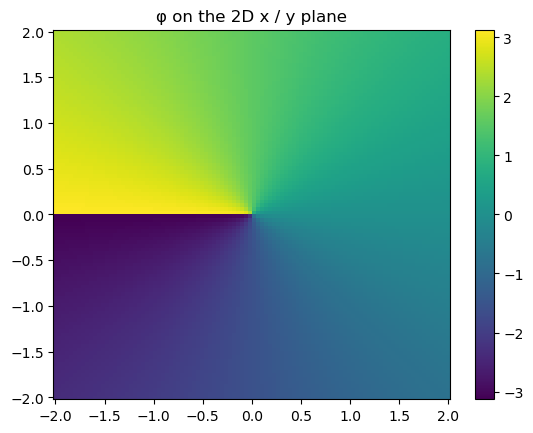

In [7]:
plt.pcolormesh(xx, yy, φ)
plt.colorbar()
plt.title ('φ on the 2D x / y plane')
plt.show()

### 1.5 Caclulate the quanity $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it on the x$ / $y$ plane

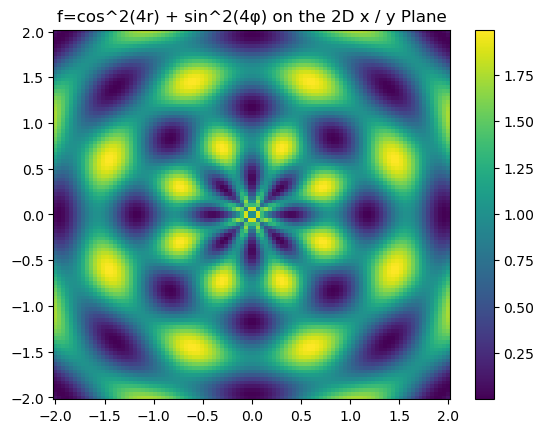

In [8]:
f = np.cos(4*r)**2 + np.sin(4*φ)**2
plt.pcolormesh (xx, yy, f)
plt.title ('f=cos^2(4r) + sin^2(4φ) on the 2D x / y Plane')
plt.colorbar ()
plt.show()

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

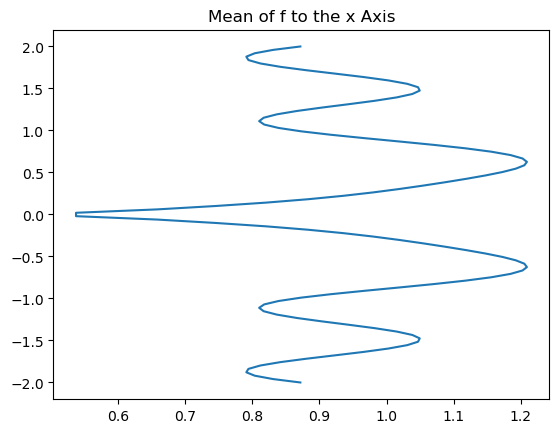

In [9]:
x_mean = np.mean (f, axis = 0)
plt.plot (x_mean,y)
plt.title ('Mean of f to the x Axis')
plt.show()

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

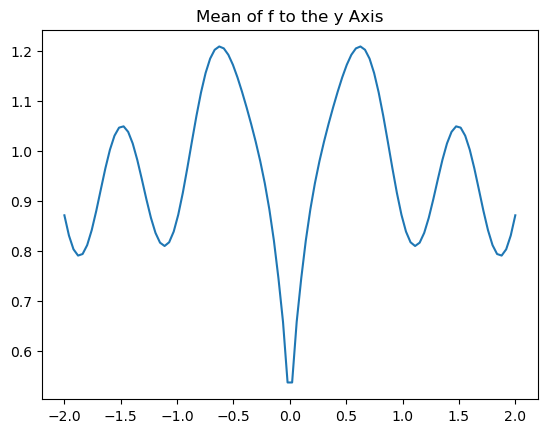

In [10]:
y_mean = np.mean (f, axis = 1)
plt.plot (x, y_mean)  #what about xx? Confused about the definition of the axis X.
plt.title ('Mean of f to the y Axis')
plt.show()

### 1.8 Plot the mean of $f$ with respect to $\phi$ as a function of $r$

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.

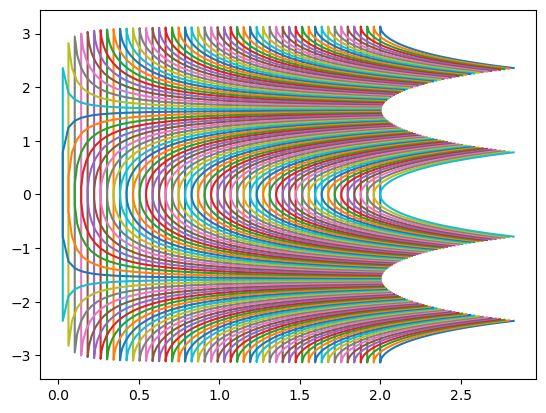

In [11]:
plt.plot(r, φ)

In [12]:
r = np.sqrt (xx**2 + yy**2)
unique_r = np.unique(r)
np.shape(unique_r)

(2666,)

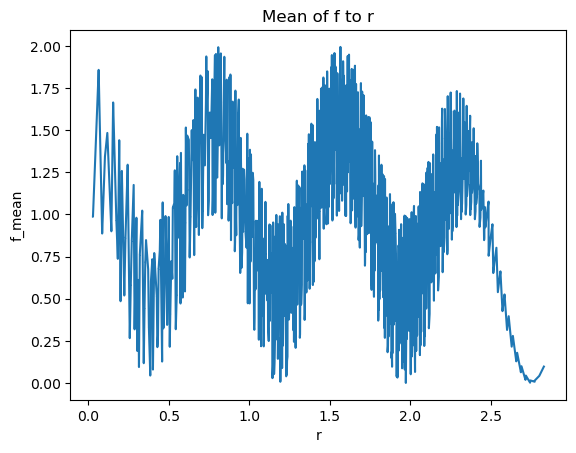

In [29]:
r = np.sqrt (xx**2 + yy**2)
φ = np.arctan2 (yy, xx)
f = np.cos(4*r)**2 + np.sin(4*φ)**2

f_mean = np.zeros(len(unique_r))
unique_r = np.unique(r)
for i,rr in enumerate (unique_r):
     mask = np.isclose(r, rr)
     f_mean[i] = np.mean(f[mask])
plt.plot (unique_r, f_mean)
plt.xlabel ('r')
plt.ylabel ('f_mean')
plt.title ('Mean of f to r')
plt.show()
#np.shape(mask)

## Part 2: Analyze [ARGO](http://www.argo.ucsd.edu) Data

In this problem, we use real data from ocean profiling floats.
ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one "profile" (a set of messurements at different depths or "levels").

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="80%" />

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let's start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise.
The following code will give you a list of `.npy` files that you can open in the next step.

In [75]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy']

### 2.1 Load each data file as a numpy array.

You can use whatever names you want for your arrays, but I recommend

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

**Note**: you have to actually look at the file name (the items in `files`) to know which files corresponds to which variable.


In [76]:
T = np.load('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy')
S = np.load ('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy')
P = np.load ('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy')
date = np.load ('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy')
lat = np.load ('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy')
lon = np.load ('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy')
level = np.load ('/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy')

### 2.2 Examine the shapes of T, S and P compared to `lon`, `lat`, `date` and `level`. How do you think they are related?

Based on the shapes, which dimensions do you think are shared among the arrays?

In [77]:
print (T.shape)
print (S.shape)
print (P.shape)
print (date.shape)
print (lat.shape)
print (lon.shape)
print (level.shape)
print ("""The dimension with a length of 75 is shared by (78, 75) and (75,). 
The dimension with a length of 78 is shared by (78, 75) and (78,).
T, S, and P differ vertically with the change of level on the graph, and
horizontally with change of date, latitude and longitude.""")

(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(75,)
(78,)
The dimension with a length of 75 is shared by (78, 75) and (75,). 
The dimension with a length of 78 is shared by (78, 75) and (78,).
T, S, and P differ vertically with the change of level on the graph, and
horizontally with change of date, latitude and longitude.


### 2.3 Make a plot for each column of data in T, S and P (three plots). 

The vertical scale should be the `levels` data. Each plot should have a line for each column of data. It will look messy.

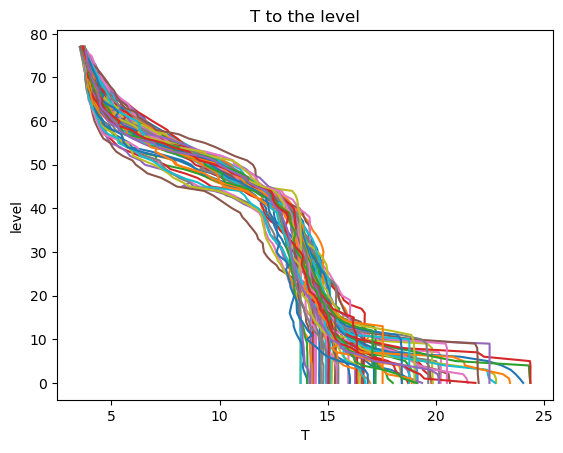

In [106]:
plt.plot (T, level)
plt.title ('T to the level')
plt.xlabel ('T')
plt.ylabel('level')
plt.show()

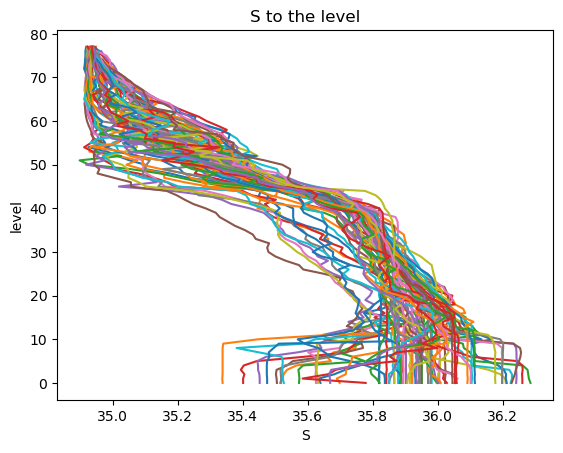

In [105]:
plt.plot (S, level)
plt.title ('S to the level')
plt.xlabel ('S')
plt.ylabel('level')
plt.show()

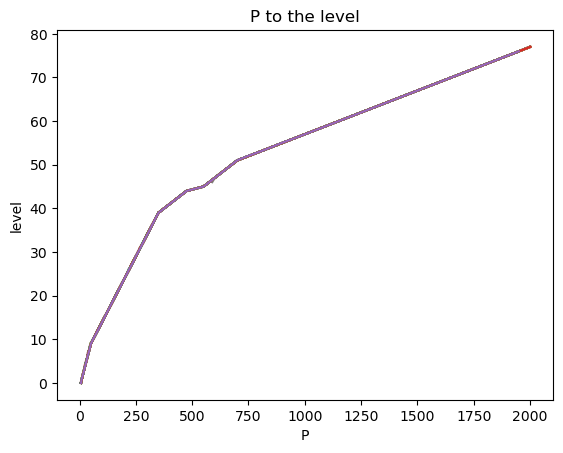

In [104]:
plt.plot (P, level)
plt.title ('P to the level')
plt.xlabel ('P')
plt.ylabel('level')
plt.show()

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [81]:
T_mean = np.mean (T, axis = 1)
T_std = np.std (T, axis = 1) 
S_mean = np.mean (S, axis = 1)
S_std = np.std (S, axis = 1) 
P_mean = np.mean (P, axis = 1)
P_std = np.std (P, axis = 1) 
for i in range(len(level)):
    print('level:', level[i], ' T_mean:',T_mean[i], ' T_std:', T_std[i], 
          ' S_mean:',S_mean[i], ' S_std:', S_std[i], 
          ' P_mean:',P_mean[i], ' P_std:', P_std[i])

level: 0  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: 6.434666713873545  P_std: 0.8534624992402788
level: 1  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 2  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 3  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 4  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 5  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 6  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 7  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 8  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 9  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 10  T_mean: nan  T_std: nan  S_mean: nan  S_std: nan  P_mean: nan  P_std: nan
level: 11  T_mean: nan  T_std: nan  S_mean: na

### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show [error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) on each plot using the standard deviations. 


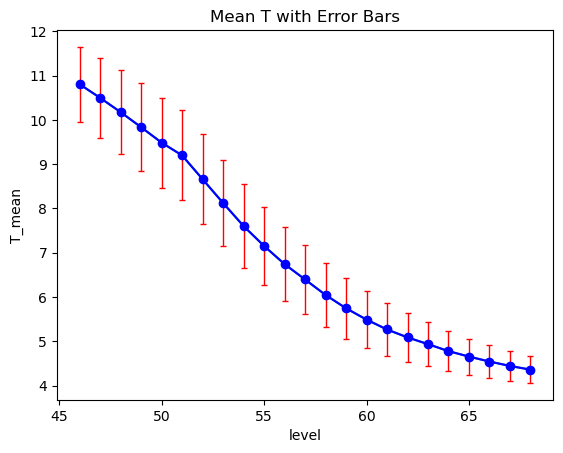

In [116]:
plt.plot (level, T_mean)
plt.errorbar(level, T_mean, yerr = T_std, fmt = 'bo''-', capsize = 2, ecolor = 'red', elinewidth = 1)
plt.title('Mean T with Error Bars')
plt.xlabel('level')
plt.ylabel('T_mean')
plt.show()

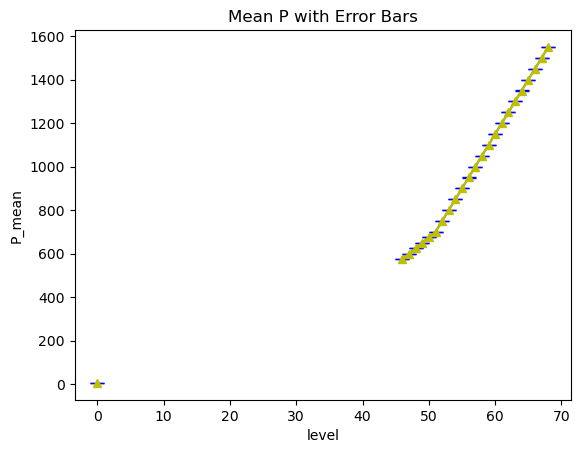

In [167]:
plt.plot (level, P_mean)
plt.errorbar(level, P_mean, yerr = P_std, fmt = 'y^''-', capsize = 5, ecolor = 'blue', elinewidth = 1)
plt.title('Mean P with Error Bars')
plt.xlabel('level')
plt.ylabel('P_mean')
plt.show()

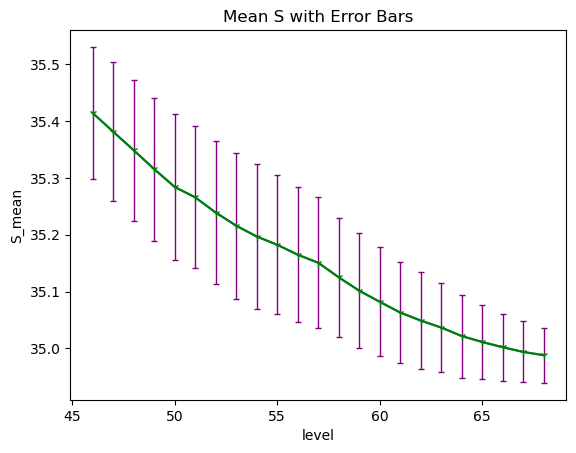

In [126]:
plt.plot (level, S_mean)
plt.errorbar(level, S_mean, yerr = S_std, fmt = 'g1''-', capsize = 2, ecolor = 'purple', elinewidth = 1)
plt.title('Mean S with Error Bars')
plt.xlabel('level')
plt.ylabel('S_mean')
plt.show()

### 2.6 Account For Missing Data

The profiles contain many missing values. These are indicated by the special "Not a Number" value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

In [140]:
T_mean1 = np.nanmean (T, axis = 1)
T_std1 = np.nanstd (T, axis = 1) 
S_mean1 = np.nanmean (S, axis = 1)
S_std1 = np.nanstd (S, axis = 1) 
P_mean1 = np.nanmean (P, axis = 1)
P_std1 = np.nanstd (P, axis = 1) 
for i in range(len(level)):
    print('level:', level[i], ' T_mean1:',T_mean1[i], ' T_std1:', T_std1[i], 
          ' S_mean1:',S_mean1[i], ' S_std1:', S_std1[i], 
          ' P_mean1:',P_mean1[i], ' P_std1:', P_std1[i])

level: 0  T_mean1: 17.601726022485185  T_std1: 2.9250089780535418  S_mean1: 35.906321799918395  S_std1: 0.2177505597373686  P_mean1: 6.434666713873545  P_std1: 0.8534624992402788
level: 1  T_mean1: 17.572236087587143  T_std1: 2.8640559124653913  S_mean1: 35.90223137537638  S_std1: 0.22181830628640692  P_mean1: 10.56891882097399  P_std1: 0.3734159198894175
level: 2  T_mean1: 17.514583296246  T_std1: 2.833245628372158  S_mean1: 35.9031343460083  S_std1: 0.21880846568934856  P_mean1: 15.54246568026608  P_std1: 0.38353722610331104
level: 3  T_mean1: 17.423263947168987  T_std1: 2.751123527650163  S_mean1: 35.90173138512505  S_std1: 0.2166159156955439  P_mean1: 20.46301360979472  P_std1: 0.367705657806369
level: 4  T_mean1: 17.249438377275858  T_std1: 2.6024842197951767  S_mean1: 35.90544583046273  S_std1: 0.2084250412175509  P_mean1: 25.425675521025788  P_std1: 0.5560626239592544
level: 5  T_mean1: 17.037301337882266  T_std1: 2.426491647071412  S_mean1: 35.91003590413969  S_std1: 0.19440185

### 2.7 Create a scatter plot of the `lon`, `lat` positions of the ARGO float.

Use the [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.

/tmp/ipykernel_373/3828603695.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(lon, lat, s = 30, cmap='inferno', alpha=0.7, edgecolors='black',  linewidths=0.5, marker='o')


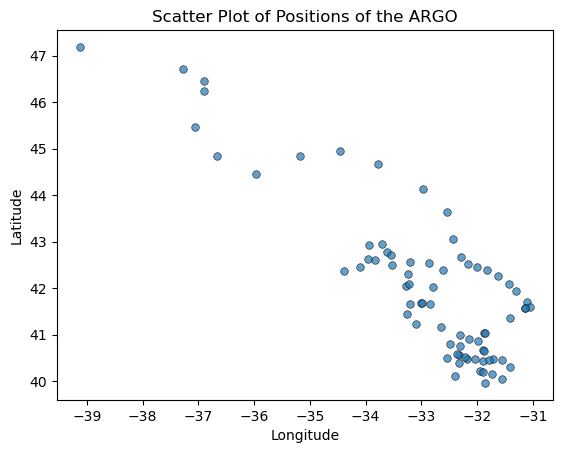

In [181]:
scatter = plt.scatter(lon, lat, s = 30, cmap='inferno', alpha=0.7, edgecolors='black',  linewidths=0.5, marker='o')
plt.title('Scatter Plot of Positions of the ARGO', fontsize=12)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()